In [11]:
#from Bio.PDB import *
import numpy as np
import math
import numpy, scipy, scipy.optimize
import matplotlib
from mpl_toolkits.mplot3d import  Axes3D
from matplotlib import cm # to colormap 3D surfaces from blue to red
import matplotlib.pyplot as plt

from numpy import *
from numpy.polynomial import polynomial as pl
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d.axes3d import Axes3D

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits

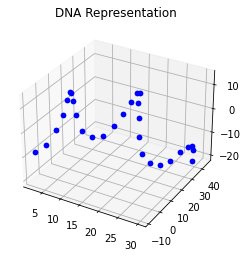

In [12]:
file = open('C:/Users/User/Downloads/5cy1.pdb', 'r')
count = 0
xs = []
ys = []
zs = []

while True:


    line = file.readline()

    if not line:
        break
    a = line.split()
    b = 0



    if a[-1] == 'P':
        if a[0] == "ATOM":
            xs.append(float(a[-6]))
            ys.append(float(a[-5]))
            zs.append(float(a[-4]))




fig = plt.figure()
ax = plt.axes(projection='3d')
for x in xs:
    y = ys[xs.index(x)]
    y = float(y)
    z = zs[xs.index(x)]
    #x = float(x)
    ax.scatter(x, y, z, c = "blue")
ax.set_title("DNA Representation")
plt.show()

In [13]:
#obtaining the coordinates for phosphorous and splitting them as necessary

x = xs[:int(floor(len(xs)/2))]
print(x)
print(len(x))
y = ys[:int(floor(len(ys)/2))]
print(y)
print(len(y))
z = zs[:int(floor(len(zs)/2))]
print(z)
print(len(z))

x1 = xs[int(floor(len(xs)/2)):]
print(x1)
print(len(x1))
y1 = ys[int(floor(len(ys)/2)):]
print(y1)
print(len(y1))
z1 = zs[int(floor(len(zs)/2)):]
print(z1)
print(len(z1))

[2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0]
29
[-8.611, -2.41, 3.039, 5.705, 6.759, 5.697, 4.199, 1.92, 1.307, 2.637, 8.255, 14.287, 20.501, 25.496, 28.857, 31.147, 29.991, 24.879, 22.223, 19.329, 18.912, 22.838, 28.554, 34.711, 40.83, 44.144, 44.853, 42.098, 37.494]
29
[-8.267, -7.277, -3.045, 2.652, 8.923, 12.75, 13.315, 11.624, 6.439, -0.043, -4.558, -6.136, -4.091, -0.476, 3.688, 6.761, 7.629, 6.174, 1.374, -5.061, -11.348, -16.604, -19.227, -19.917, -18.348, -17.031, -16.419, -16.542, -18.893]
29
[2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0]
29
[35.839, 30.066, 26.919, 27.01, 29.752, 33.496, 36.787, 38.143, 37.901, 34.867, 27.986, 22.024, 16.237, 14.386, 13.489, 12.958, 14.914, 18.564, 20.754, 19.393, 16.834, 11.076, 5.058, -1.032, -5.614, -

In [14]:
#determining the total distance covered by the connection between the knot points and the middle distance

#determines the "half length" of the DNA
distance_list = []
total_distance = 0

for x_coord in x:
    x_temp = float(x_coord)
    y_temp = float(y[x.index(x_coord)])
    z_temp = float(z[x.index(x_coord)])
    
    if (x.index(x_coord) + 1) != len(x):
        x_temp1 = float(x[x.index(x_coord) + 1])
        y_temp1 = float(y[x.index(x_coord) + 1])
        z_temp1 = float(z[x.index(x_coord) + 1])

        distance = ((x_temp1 - x_temp)**2 + (y_temp1 - y_temp)**2 + (z_temp1 - z_temp)**2)**0.5
        distance_list.append(distance)

for distance in distance_list:
    total_distance += distance

half_length = total_distance/2
print(half_length)

#determines the distance from the closest points and what the closest points are
distance_from_closest_point = half_length
point_1x = 0
point_1y = 0
point_1z = 0
point_2x = 0
point_2y = 0
point_2z = 0

for distance in distance_list:
    distance_from_closest_point -= distance
    if distance_from_closest_point < 0:
        distance_from_closest_point += distance
        point_1x = float(x[distance_list.index(distance)])
        point_1y = float(y[distance_list.index(distance)])
        point_1z = float(z[distance_list.index(distance)])
        point_2x = float(x[distance_list.index(distance) + 1])
        point_2y = float(y[distance_list.index(distance) + 1])
        point_2z = float(z[distance_list.index(distance) + 1])
        break
    else:
        continue

print(distance_from_closest_point)
print("(" + str(point_1x) + "," + str(point_1y) + "," + str(point_1z) + "), (" + str(point_2x) + "," + str(point_2y) + "," + str(point_2z) + ")")

distance_between_point = ((point_2x - point_1x)**2 + (point_2y - point_1y)**2 + (point_2z - point_1z)**2)**0.5
print(distance_between_point)

#uses ratios to find coordinates of midpoint
r = distance_from_closest_point/distance_between_point
print(r)

dx = point_2x-point_1x
rdx = abs(r * dx)
mid_x = rdx + point_1x

dy = point_2y-point_1y
rdy = abs(r * dy)
mid_y = rdy + point_1y

dz = point_2z-point_1z
rdz = abs(r * dz)
mid_z = rdz + point_1z
print("(" + str(mid_x) + "," + str(mid_y) + "," + str(mid_z) + ")")

74.09649891671852
0.5045778875915543
(15.0,25.496,-0.476), (16.0,28.857,3.688)
5.443823748065325
0.09268813814386913
(15.092688138143869,25.807524832301542,-0.09004659276892896)


In [15]:
#same thing as above but for x1, y1, and z1 instead instead

distance_list1 = []
total_distance1 = 0

for x_coord in x1:
    x_temp = float(x_coord)
    y_temp = float(y1[x1.index(x_coord)])
    z_temp = float(z1[x1.index(x_coord)])
    
    if (x1.index(x_coord) + 1) != len(x):
        x_temp1 = float(x1[x1.index(x_coord) + 1])
        y_temp1 = float(y1[x1.index(x_coord) + 1])
        z_temp1 = float(z1[x1.index(x_coord) + 1])

        distance = ((x_temp1 - x_temp)**2 + (y_temp1 - y_temp)**2 + (z_temp1 - z_temp)**2)**0.5
        distance_list1.append(distance)

for distance in distance_list1:
    total_distance1 += distance

half_length1 = total_distance1/2
print(half_length1)

distance_from_closest_point1 = half_length1
point_1x1 = 0
point_1y1 = 0
point_1z1 = 0
point_2x1 = 0
point_2y1 = 0
point_2z1 = 0

for distance in distance_list1:
    distance_from_closest_point1 -= distance
    if distance_from_closest_point1 < 0:
        distance_from_closest_point1 += distance
        point_1x1 = float(x1[distance_list1.index(distance)])
        point_1y1 = float(y1[distance_list1.index(distance)])
        point_1z1 = float(z1[distance_list1.index(distance)])
        point_2x1 = float(x1[distance_list1.index(distance) + 1])
        point_2y1 = float(y1[distance_list1.index(distance) + 1])
        point_2z1 = float(z1[distance_list1.index(distance) + 1])
        break
    else:
        continue

print(distance_from_closest_point1)
print("(" + str(point_1x1) + "," + str(point_1y1) + "," + str(point_1z1) + "), (" + str(point_2x1) + "," + str(point_2y1) + "," + str(point_2z1) + ")")

distance_between_point1 = ((point_2x1 - point_1x1)**2 + (point_2y1 - point_1y1)**2 + (point_2z1 - point_1z1)**2)**0.5
print(distance_between_point1)

r1 = distance_from_closest_point1/distance_between_point1
print(r1)

dx1 = point_2x1-point_1x1
rdx1 = abs(r * dx1)
mid_x1 = rdx1 + point_1x1

dy1 = point_2y1-point_1y1
rdy1 = abs(r * dy1)
mid_y1 = rdy1 + point_1y1

dz1 = point_2z1-point_1z1
rdz1 = abs(r * dz1)
mid_z1 = rdz1 + point_1z1
print("(" + str(mid_x1) + "," + str(mid_y1) + "," + str(mid_z1) + ")")

75.13799084119319
2.2032909296408763
(15.0,14.386,-0.95), (16.0,13.489,4.32)
5.438520846700874
0.4051268702918443
(15.092688138143869,14.46914125991505,-0.4615335119818096)


In [16]:
#finds final midpoints

final_mid_x = mid_x + mid_x1
final_mid_x *= 0.5
final_mid_y = mid_y + mid_y1
final_mid_y *= 0.5
final_mid_z = mid_z + mid_z1
final_mid_z *= 0.5

print("(" + str(final_mid_x) + "," + str(final_mid_y) + "," + str(final_mid_z) + ")")

(15.092688138143869,20.138333046108297,-0.27579005237536924)


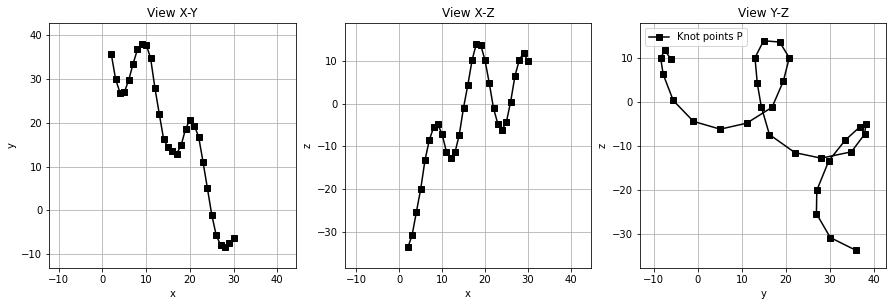

In [17]:
%matplotlib inline

#--- Generate and store knot points in matrix P

n = len(x)

P = zeros([n,3])
P[:,0] = x1
P[:,1] = y1
P[:,2] = z1

#--- Add some random noise to knot points excl. end-points
#P[range(1,n-1),:] += random.normal(size=(n-2,3)) * 0.02

#--- Calculate some points to display the generating curve
#x_gen = linspace(-2, 2, 50)
#y_gen, z_gen = generate_yz_coords(x_gen)
#P_gen = zeros([len(x_gen),3])
#P_gen[:,0] = x_gen
#P_gen[:,1] = y_gen
#P_gen[:,2] = z_gen

#--- Plot
f, ax = subplots(1, 3, figsize=(15,4.5))
i = 0
#ax[i].plot(P_gen[:,0], P_gen[:,1], 'y-', lw=2 ,label='Generating Curve')
ax[i].plot(P[:,0], P[:,1], 'ks-', label='Knot points P')
ax[i].set_title('View X-Y')
ax[i].set_xlabel('x'); ax[i].set_ylabel('y');
ax[i].set_aspect('equal', 'datalim')
ax[i].margins(.1, .1)
ax[i].grid()
i = 1
#ax[i].plot(P_gen[:,0], P_gen[:,2], 'y-', lw=2 ,label='Generating Curve')
ax[i].plot(P[:,0], P[:,2], 'ks-', label='Knot points P')
ax[i].set_title('View X-Z')
ax[i].set_xlabel('x'); ax[i].set_ylabel('z'); 
ax[i].set_aspect('equal', 'datalim')
ax[i].margins(.1, .1)
ax[i].grid()
i = 2
#ax[i].plot(P_gen[:,1], P_gen[:,2], 'y-', lw=2 ,label='Generating Curve')
ax[i].plot(P[:,1], P[:,2], 'ks-', label='Knot points P')
ax[i].set_title('View Y-Z')
ax[i].set_xlabel('y'); ax[i].set_ylabel('z'); 
ax[i].set_aspect('equal', 'datalim')
ax[i].margins(.1, .1)
ax[i].legend()
ax[i].grid()

In [18]:
def uniform_param(P):
    u = linspace(0, 1, len(P))
    return u
    
def chordlength_param(P):
    u = generate_param(P, alpha=1.0)
    return u
    
def centripetal_param(P):
    u = generate_param(P, alpha=0.5)
    return u
    
def generate_param(P, alpha):
    n = len(P)
    u = zeros(n)
    u_sum = 0
    for i in range(1,n):
        u_sum += linalg.norm(P[i,:]-P[i-1,:])**alpha
        u[i] = u_sum
    
    return u/max(u)

In [19]:
#-------------------------------------------------------------------------------
# Find Minimum by Golden Section Search Method
# - Return x minimizing function f(x) on interval a,b
#-------------------------------------------------------------------------------
def find_min_gss(f, a, b, eps=1e-4):
    
    # Golden section: 1/phi = 2/(1+sqrt(5))
    R = 0.61803399
    
    # Num of needed iterations to get precision eps: log(eps/|b-a|)/log(R)
    n_iter = int(ceil(-2.0780869 * log(eps/abs(b-a))))
    c = b - (b-a)*R
    d = a + (b-a)*R

    for i in range(n_iter):
        if f(c) < f(d):
            b = d
        else:
            a = c
        c = b - (b-a)*R
        d = a + (b-a)*R

    return (b+a)/2

In [20]:
def iterative_param(P, u, fxcoeff, fycoeff, fzcoeff, fig_ax):
    
    global iter_i, plt_color
    u_new = u.copy()
    f_u = zeros(3)

    #--- Calculate approx. error s(u) related to point P_i
    def calc_s(u):
        f_u[0] = pl.polyval(u, fxcoeff)
        f_u[1] = pl.polyval(u, fycoeff)
        f_u[2] = pl.polyval(u, fzcoeff)

        s_u = linalg.norm(P[i]-f_u)
        return s_u
    
    #--- Find new values u that locally minimising the approximation error (excl. fixed end-points)
    for i in range(1, len(u)-1):
        
        #--- Find new u_i minimising s(u_i) by Golden search method
        u_new[i] = find_min_gss(calc_s, u[i-1], u[i+1])
        
        #--- Sample some values bewteen u[i-1] and u[i+1] to plot graph
        u_samp = linspace(u[i-1], u[i+1], 25)
        
        x = pl.polyval(u_samp, fxcoeff)
        y = pl.polyval(u_samp, fycoeff)
        z = pl.polyval(u_samp, fzcoeff)

        residual = P[i] - array([x,y,z]).T
        s_u_samp = [linalg.norm(residual[j]) for j in range(len(u_samp))]
        
        #--- Plot error to given axes
        fig_ax.plot(u_samp, s_u_samp, color=plt_color[iter_i], alpha=plt_alpha)
        fig_ax.plot(u_new[i], calc_s(u_new[i]), 'o', color=plt_color[iter_i], alpha=plt_alpha)
        
    return u_new

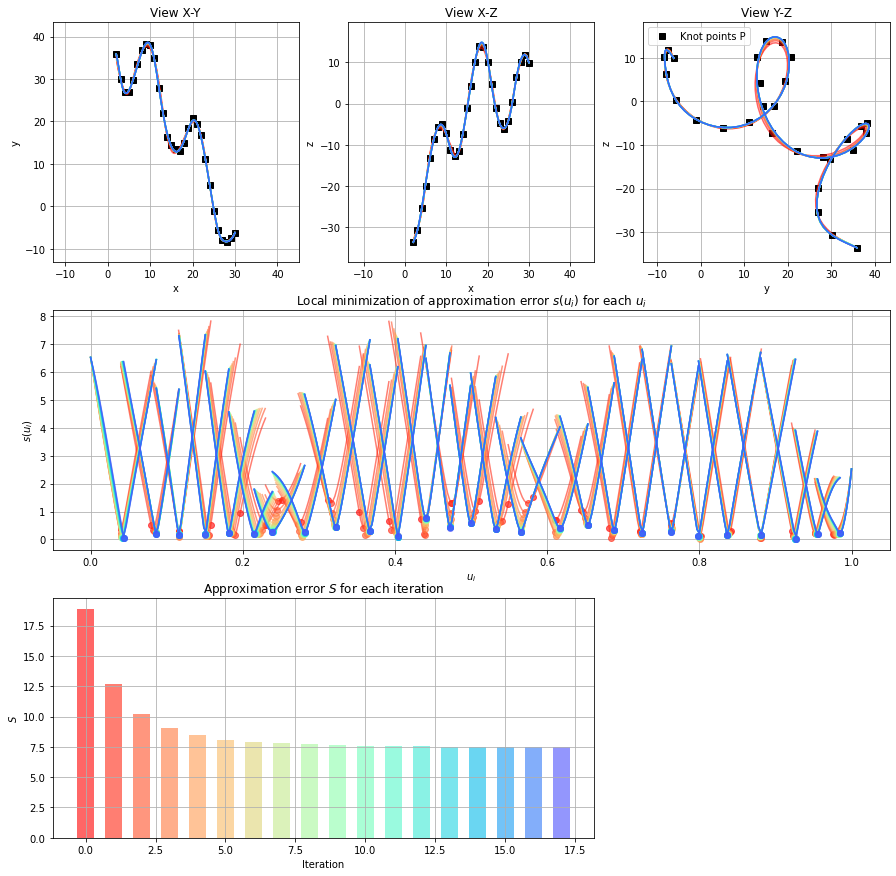

In [21]:
%matplotlib inline

#-------------------------------------------------------------------------------
# Options for the approximation method
#-------------------------------------------------------------------------------
polydeg = 11          # Degree of polygons of parametric curve
w = ones(n)           # Set weights for knot points
w[0] = w[-1] = 1e6
max_iter = 20         # Max. number of iterations
eps = 1e-3
plt_alpha = 0.6
plt_color = cm.rainbow(linspace(1,0,max_iter))

#-------------------------------------------------------------------------------
# Init variables
#-------------------------------------------------------------------------------
f_u = zeros([n,3])
uu = linspace(0,1,100)
f_uu = zeros([len(uu),3])
S_hist = []

#-------------------------------------------------------------------------------
# Init figures
#-------------------------------------------------------------------------------
fig = figure(figsize=(15,15))
figshape = (3,3)
ax = [None]*5
ax[0] = subplot2grid(figshape, loc=(0,0))
ax[1] = subplot2grid(figshape, loc=(0,1))
ax[2] = subplot2grid(figshape, loc=(0,2))
ax[3] = subplot2grid(figshape, loc=(1,0), colspan=3)
ax[4] = subplot2grid(figshape, loc=(2,0), colspan=2)
i = 0
#ax[i].plot(P_gen[:,0], P_gen[:,1], 'y-', lw=2 ,label='Generating Curve')
ax[i].plot(P[:,0], P[:,1], 'ks', label='Knot points P')
ax[i].set_title('View X-Y')
ax[i].set_xlabel('x'); ax[i].set_ylabel('y');
ax[i].set_aspect('equal', 'datalim')
ax[i].margins(.1, .1)
ax[i].grid()
i = 1
#ax[i].plot(P_gen[:,0], P_gen[:,2], 'y-', lw=2 ,label='Generating Curve')
ax[i].plot(P[:,0], P[:,2], 'ks', label='Knot points P')
ax[i].set_title('View X-Z')
ax[i].set_xlabel('x'); ax[i].set_ylabel('z'); 
ax[i].set_aspect('equal', 'datalim')
ax[i].margins(.1, .1)
ax[i].grid()
i = 2
#ax[i].plot(P_gen[:,1], P_gen[:,2], 'y-', lw=2 ,label='Generating Curve')
ax[i].plot(P[:,1], P[:,2], 'ks', label='Knot points P')
ax[i].set_title('View Y-Z')
ax[i].set_xlabel('y'); ax[i].set_ylabel('z'); 
ax[i].set_aspect('equal', 'datalim')
ax[i].margins(.1, .1)
ax[i].legend()
ax[i].grid()
i = 3
ax[i].set_title('Local minimization of approximation error $s(u_i)$ for each $u_i$')
ax[i].set_xlabel('$u_i$'); ax[i].set_ylabel('$s(u_i)$');
ax[i].grid()
i = 4
ax[i].set_title('Approximation error $S$ for each iteration')
ax[i].set_xlabel('Iteration'); ax[i].set_ylabel('$S$');
ax[i].grid()

#-------------------------------------------------------------------------------
# Compute the iterative approximation
#-------------------------------------------------------------------------------
for iter_i in range(max_iter):

    #--- Initial or iterative parametrization
    if iter_i == 0:
        #u = uniform_param(P)
        #u = chordlength_param(P)
        u = centripetal_param(P)
    else:
        u = iterative_param(P, u, fxcoeff, fycoeff, fzcoeff, ax[3])
    
    #--- Compute polynomial approximations and get their coefficients
    fxcoeff = pl.polyfit(u, P[:,0], polydeg, w=w)
    fycoeff = pl.polyfit(u, P[:,1], polydeg, w=w)
    fzcoeff = pl.polyfit(u, P[:,2], polydeg, w=w)
    
    #--- Calculate function values f(u)=(fx(u),fy(u),fz(u))
    f_u[:,0] = pl.polyval(u, fxcoeff)
    f_u[:,1] = pl.polyval(u, fycoeff)
    f_u[:,2] = pl.polyval(u, fzcoeff)
    
    #--- Calculate fine values for ploting
    f_uu[:,0] = pl.polyval(uu, fxcoeff)
    f_uu[:,1] = pl.polyval(uu, fycoeff)
    f_uu[:,2] = pl.polyval(uu, fzcoeff)

    #--- Print plots
    hp = ax[0].plot(f_uu[:,0], f_uu[:,1], color=plt_color[iter_i], alpha=plt_alpha)
    hp = ax[1].plot(f_uu[:,0], f_uu[:,2], color=plt_color[iter_i], alpha=plt_alpha)
    hp = ax[2].plot(f_uu[:,1], f_uu[:,2], color=plt_color[iter_i], alpha=plt_alpha)

    #--- Errors of init parametrization
    if iter_i == 0:
        for i in range(1, len(u)-1):
            ax[3].plot(u[i], linalg.norm(P[i]-f_u[i]), 'o', color=plt_color[iter_i], alpha=plt_alpha)
    
    #--- Total error of approximation S for iteration i
    S = 0
    for j in range(len(u)):
        S += w[j] * linalg.norm(P[j] - f_u[j])
    
    #--- Add bar of approx. error
    ax[4].bar(iter_i, S, width=0.6, color=plt_color[iter_i], alpha=plt_alpha)
    S_hist.append(S)
    
    #--- Stop iterating if change in error is lower than desired condition
    if iter_i > 0:
        S_change = S_hist[iter_i-1] / S_hist[iter_i] - 1
        #print('iteration:%3i, approx.error: %.4f (%f)' % (iter_i, S_hist[iter_i], S_change))
        if S_change < eps:
            break

In [22]:
print(fxcoeff)
print(fycoeff)
print(fzcoeff)

[ 2.00000000e+00  2.50111514e+01 -6.61709270e+01  1.87324257e+02
  1.14142117e+04 -1.11919163e+05  4.70100341e+05 -1.09547273e+06
  1.51910692e+06 -1.24929111e+06  5.63362639e+05 -1.07419274e+05]
[ 3.58390000e+01 -9.47253841e+01 -1.97377124e+03  3.25934621e+04
 -1.55259620e+05  3.30573525e+05 -4.10398926e+05  6.33868690e+05
 -1.28931850e+06  1.63346124e+06 -1.02171881e+06  2.48225384e+05]
[-3.35820000e+01  4.32108413e+01  5.81237403e+02 -6.62105996e+03
  1.82762988e+05 -1.68536207e+06  7.21585540e+06 -1.70643352e+07
  2.37780567e+07 -1.95058671e+07  8.73647971e+06 -1.65155036e+06]


In [28]:
%matplotlib

#-------------------------------------------------------------------------------
# - Make axes of 3D plot to have equal scales
# - This is a workaround to Matplotlib's set_aspect('equal') and axis('equal')
#   which were not working for 3D
#-------------------------------------------------------------------------------
def set_axes_equal_3d(ax):
    limits = array([ax.get_xlim3d(), ax.get_ylim3d(), ax.get_zlim3d()])
    spans = abs(limits[:,0] - limits[:,1])
    centers = mean(limits, axis=1)
    radius = 0.5 * max(spans)
    ax.set_xlim3d([centers[0]-radius, centers[0]+radius])
    ax.set_ylim3d([centers[1]-radius, centers[1]+radius])
    ax.set_zlim3d([centers[2]-radius, centers[2]+radius])

#--- 3D Plot
fig = figure(figsize=(14,10))
ax = fig.add_subplot(1,1,1,projection='3d')

#ax.plot(*P_gen.T, color='y', lw=4, label='Generating Curve')
ax.scatter(mid_x1, mid_y1, mid_z1, c = "red")
ax.scatter(final_mid_x, final_mid_y, final_mid_z, c = "green")
ax.plot(*P.T, color='k', ls='--', marker='s', label='Knot points P')
ax.plot(*f_uu.T, color='b', ls='-', lw=3, label='Approximation Curve')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
#ax.set_aspect('equal', 'datalim')
set_axes_equal_3d(ax)

Using matplotlib backend: QtAgg


In [24]:
xs = np.array(xs)
ys = np.array(ys)
zs = np.array(zs)
data = [xs, ys, zs]

In [25]:
def SurfacePlot(func, data, fittedParameters):
    f = plt.figure(figsize=(100, 100), dpi=100)

    matplotlib.pyplot.grid(True)
    axes = plt.subplot(111, projection="3d")

    # extract data from the single list
    x_data = data[0]
    y_data = data[1]
    z_data = data[2]

    xModel = np.linspace(min(x_data), max(x_data), 20)
    yModel = np.linspace(min(y_data), max(y_data), 20)
    X, Y = np.meshgrid(xModel, yModel)

    Z = func(np.array([X, Y]), *fittedParameters)

    axes.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1, antialiased=True)

    axes.scatter(x_data, y_data, z_data) # show data along with plotted surface

    axes.set_title('Surface Plot (click-drag with mouse)') # add a title for surface plot
    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label
    axes.set_zlabel('Z Data') # Z axis data label
    
    plt.show()
    plt.close('all') # clean up after using pyplot or else there can be memory and process problems

In [26]:
def ContourPlot(func, data, fittedParameters):
    f = plt.figure(figsize=(100.0, 100.0), dpi=100)
    axes = f.add_subplot(111)

    # extract data from the single list
    x_data = data[0]
    y_data = data[1]
    z_data = data[2]

    xModel = numpy.linspace(min(x_data), max(x_data), 20)
    yModel = numpy.linspace(min(y_data), max(y_data), 20)
    X, Y = numpy.meshgrid(xModel, yModel)

    Z = func(numpy.array([X, Y]), *fittedParameters)

    axes.plot(x_data, y_data, 'o')

    axes.set_title('Contour Plot') # add a title for contour plot
    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    CS = matplotlib.pyplot.contour(X, Y, Z, 16, colors='k')
    matplotlib.pyplot.clabel(CS, inline=1, fontsize=10) # labels for contours

    plt.show()
    plt.close('all') # clean up after using pyplot or else there can be memory and process problems

In [30]:
def func(data, a1, a2, b):

    # extract data from the single list
    x1 = data[0]
    x2 = data[1]

    return (a1/x1)+a2*x2+b

if __name__ == "__main__":
    initialParameters = [1.0, 1.0, 1.0] # these are the same as scipy default values in this example

    # here a non-linear surface fit is made with scipy's curve_fit()
    fittedParameters, pcov = scipy.optimize.curve_fit(func, [xs, ys], zs, p0 = initialParameters)
    print(fittedParameters)
    
    SurfacePlot(func, data, fittedParameters)

    #SurfacePlot(func, data,fittedParameters)
    print('fitted parameters', fittedParameters)

    modelPredictions = func(data, *fittedParameters)

    absError = modelPredictions - zs
    print(modelPredictions)

    SE = np.square(absError) # squared errors
    MSE = np.mean(SE) # mean squared errors
    RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (np.var(absError) / np.var(zs))
    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)

[-47.36577768  -0.47533472   9.76326751]
fitted parameters [-47.36577768  -0.47533472   9.76326751]
[ -9.82651408  -4.87976838  -3.52271912  -2.42167259  -1.34381613
   0.28874595   1.84661482   3.58776066   4.40542726   4.20383007
   1.89223127  -0.67136096  -3.36483937  -5.51358496  -6.91382754
  -7.82820516  -7.1239281   -4.5555206   -3.1683848   -1.67999047
  -1.37925257  -3.15180841  -5.78301409  -8.63070698 -11.46640969
 -12.97419633 -13.24855549 -11.88067611  -9.63779165 -30.95514227
 -20.31673867 -14.87371217 -12.54867875 -12.27318729 -12.92508386
 -13.64359296 -13.63028881 -12.98897139 -11.11620788  -7.48659804
  -4.34902567  -1.33801214  -0.23261625   0.3911164    0.81765802
   0.04269344  -1.55378186  -2.4701181   -1.71041189  -0.39150702
   2.43907854   5.38545044   8.35918183  10.61003593  11.76887706
  12.09866832  11.71303793  11.13481084]
RMSE: 8.169227032016305
R-squared: 0.5066680869320623
